In [1]:
import pandas as pd

# Load lending dataset
df = pd.read_csv('custom_fintech_lending.csv')

# Quick data inspection
print(df.head())
print(df.info())
print(df.isnull().sum())

# Clean data: remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Calculate key financial metrics
df['Net_Profit'] = df['Interest_Received'] - (df['Loan_Amount'] * df['Default_Rate'])
df['ROI'] = df['Net_Profit'] / df['Loan_Amount']
df['Risk_Score'] = df['Default_Rate'] * 100

# Preview calculated fields
print(df[['Loan_ID', 'Loan_Amount', 'Interest_Received', 
          'Default_Rate', 'Net_Profit', 'ROI', 'Risk_Score']].head())

# Export cleaned data to Excel
df.to_excel('cleaned_fintech_lending_data.xlsx', index=False)



   Loan_ID  Customer_ID  Loan_Amount  Interest_Rate  Default_Rate  \
0        1         1102      7034.84         0.0892        0.1291   
1        2         1435      6186.51         0.0515        0.1860   
2        3         1860     21940.85         0.1795        0.0136   
3        4         1270     41474.90         0.2296        0.1006   
4        5         1106     49427.43         0.0987        0.1407   

        Loan_Type Customer_Segment  Issue_Date  Interest_Received  
0        Mortgage         Subprime  2022-01-01             627.51  
1  Small Business            Prime  2022-01-02             318.61  
2            Auto       Near Prime  2022-01-03            3938.38  
3            Auto       Near Prime  2022-01-04            9522.64  
4        Mortgage         Subprime  2022-01-05            4878.49  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             

In [3]:
# Check all column names
print(df.columns)



Index(['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate',
       'Default_Rate', 'Loan_Type', 'Customer_Segment', 'Issue_Date',
       'Interest_Received', 'Net_Profit', 'ROI', 'Risk_Score'],
      dtype='object')


In [8]:
# Import core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style for seaborn plots
sns.set(style="whitegrid")

# Set default plot size
plt.rcParams["figure.figsize"] = (10, 6)



In [10]:
# Set a seed for reproducibility (same random data every time you run it)
np.random.seed(42)

# Number of simulated loan records
n = 1000

# Create synthetic fintech lending dataset
df = pd.DataFrame({
    'Loan_ID': np.arange(1, n + 1),  # Unique loan identifier
    'Customer_ID': np.random.randint(1000, 2000, size=n),  # Random customer ID
    'Loan_Amount': np.random.uniform(5000, 50000, size=n).round(2),  # Loan amount in currency
    'Interest_Rate': np.random.uniform(0.05, 0.25, size=n).round(4),  # Annual interest rate (5% to 25%)
    'Default_Rate': np.random.uniform(0.01, 0.20, size=n).round(4),  # Expected default rate (1% to 20%)
    'Loan_Type': np.random.choice(
        ['Personal', 'Mortgage', 'Auto', 'Education', 'Small Business'], size=n),  # Loan category
    'Customer_Segment': np.random.choice(
        ['Prime', 'Subprime', 'Near Prime'], size=n),  # Risk category of borrower
    'Issue_Date': pd.date_range(start='2022-01-01', periods=n, freq='D')  # Loan issue date (one per day)
})



In [12]:
# Calculate total interest expected from each loan
df['Interest_Received'] = (df['Loan_Amount'] * df['Interest_Rate']).round(2)

# Net Profit = Interest earned - expected loss due to default
df['Net_Profit'] = df['Interest_Received'] - (df['Loan_Amount'] * df['Default_Rate'])

# ROI = Net Profit divided by loan amount (profitability ratio)
df['ROI'] = df['Net_Profit'] / df['Loan_Amount']

# Risk Score = Default rate converted to percentage for readability
df['Risk_Score'] = df['Default_Rate'] * 100



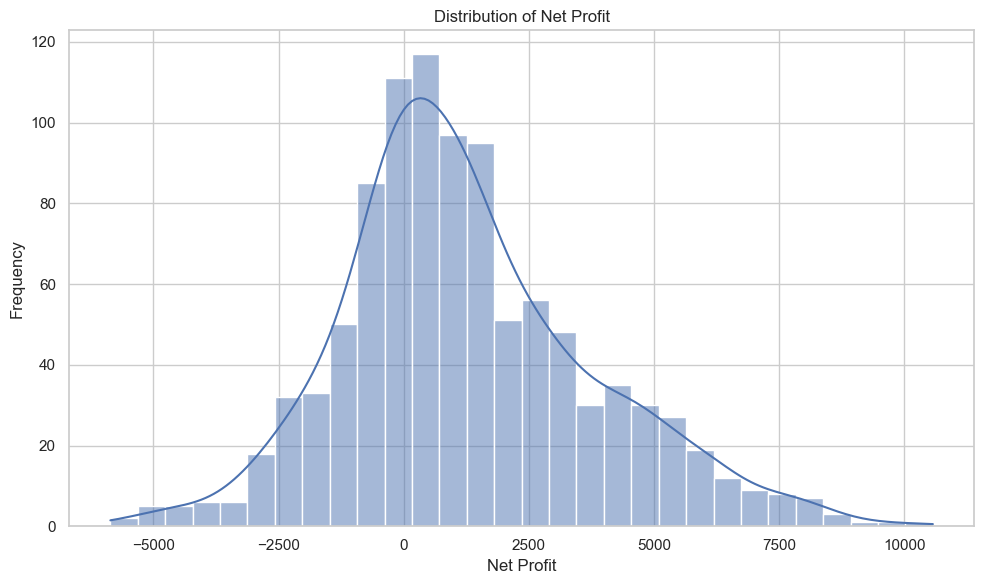

In [14]:
# Plot the distribution of Net Profit using a histogram with a KDE curve
sns.histplot(df['Net_Profit'], bins=30, kde=True)

# Set chart title and axis labels
plt.title("Distribution of Net Profit")
plt.xlabel("Net Profit")
plt.ylabel("Frequency")

# Optimize spacing and display the plot
plt.tight_layout()
plt.show()



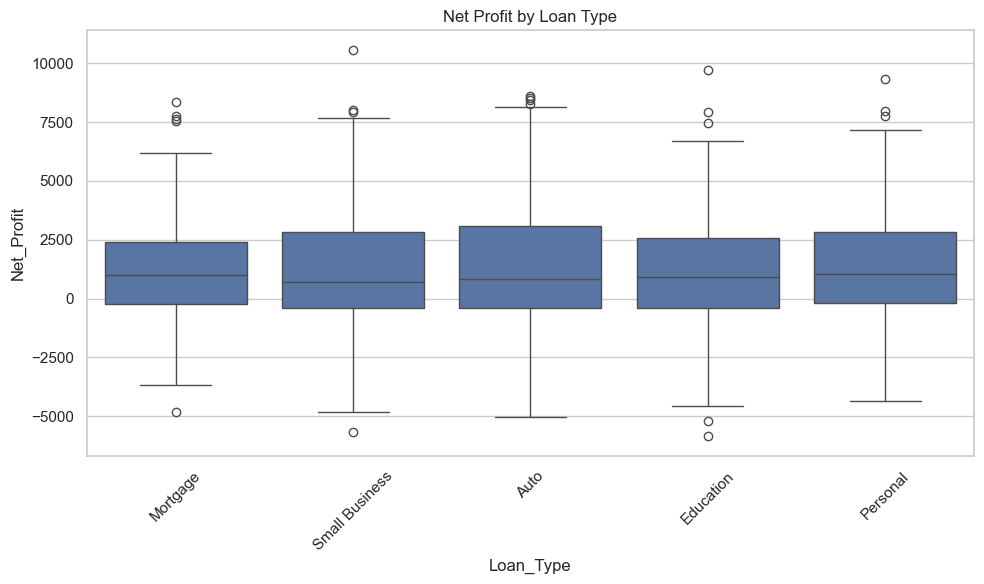

In [16]:
# Create a boxplot to visualize Net Profit distribution across different loan types
sns.boxplot(data=df, x='Loan_Type', y='Net_Profit')

# Add a title and rotate x-axis labels for readability
plt.title("Net Profit by Loan Type")
plt.xticks(rotation=45)

# Optimize spacing and display the plot
plt.tight_layout()
plt.show()


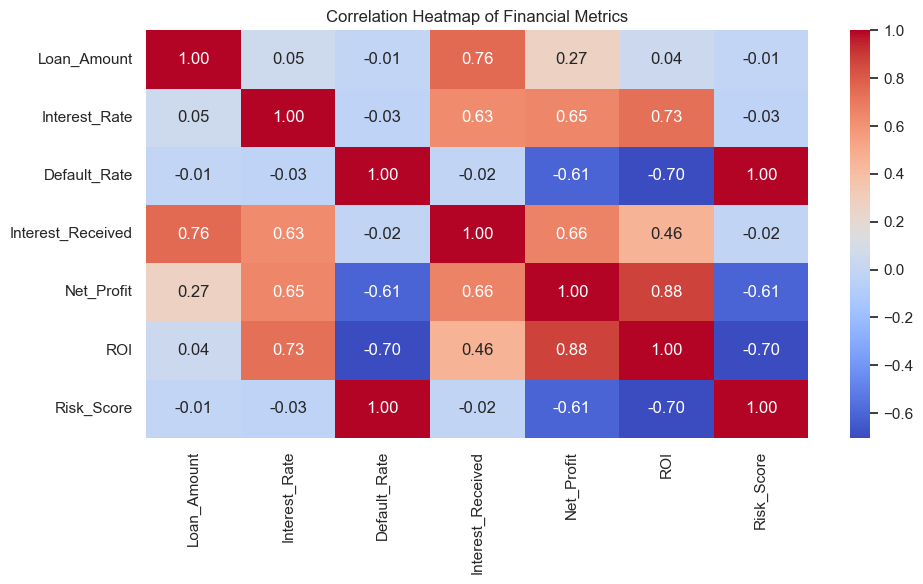

In [18]:
# Select numerical columns and compute their correlation matrix
corr_matrix = df[['Loan_Amount', 'Interest_Rate', 'Default_Rate',
                  'Interest_Received', 'Net_Profit', 'ROI', 'Risk_Score']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title and format layout
plt.title("Correlation Heatmap of Financial Metrics")
plt.tight_layout()
plt.show()


In [20]:
# Import statistical functions from SciPy
from scipy import stats


In [22]:
# Filter Net Profit values for Prime and Subprime customer segments
prime = df[df['Customer_Segment'] == 'Prime']['Net_Profit']
subprime = df[df['Customer_Segment'] == 'Subprime']['Net_Profit']


In [24]:
# Perform an independent t-test to compare Net Profit between Prime and Subprime segments
# equal_var=False assumes the two groups may have different variances (Welch's t-test)
t_stat, p_value = stats.ttest_ind(prime, subprime, equal_var=False)


In [26]:
# Display the T-statistic and P-value from the test
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")



T-Statistic: 0.3056
P-Value: 0.7600


In [28]:
# Group Net Profit values by Loan Type
groups = df.groupby('Loan_Type')['Net_Profit']



In [30]:
# Extract Net Profit values for each loan type from the grouped data
auto = groups.get_group('Auto')
mortgage = groups.get_group('Mortgage')
personal = groups.get_group('Personal')
education = groups.get_group('Education')
smallbiz = groups.get_group('Small Business')



In [32]:
# Perform a one-way ANOVA test to compare Net Profit across all loan types
# H0: All loan types have the same mean Net Profit
f_stat, p_value = stats.f_oneway(auto, mortgage, personal, education, smallbiz)



In [31]:
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


F-Statistic: 0.1092
P-Value: 0.9793


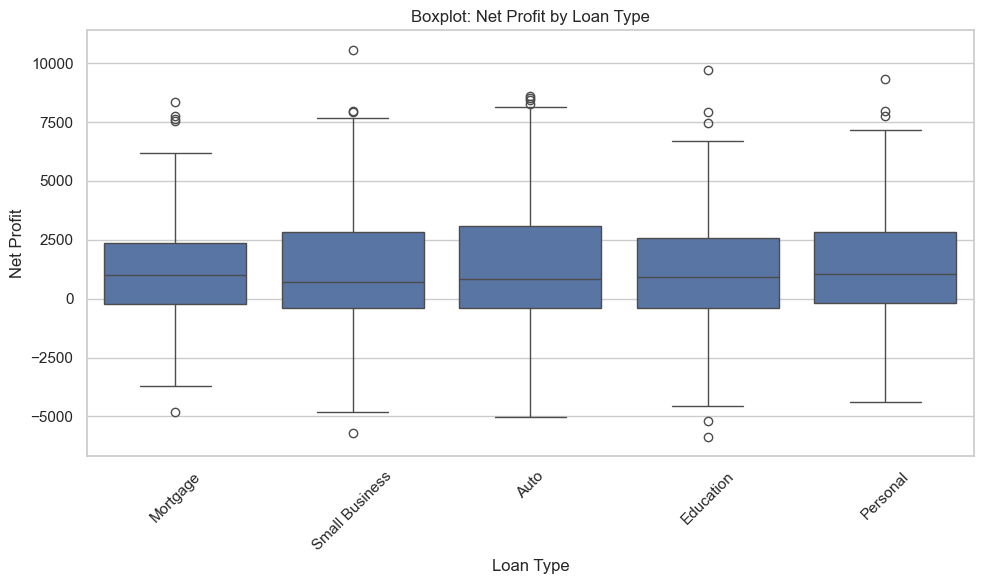

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for clean plots
sns.set(style="whitegrid")

# Create a boxplot to compare Net Profit across different loan types
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(data=df, x='Loan_Type', y='Net_Profit')

# Add titles and labels
plt.title("Boxplot: Net Profit by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Net Profit")

# Improve readability by rotating loan type labels
plt.xticks(rotation=45)

# Apply tight layout and show the plot
plt.tight_layout()
plt.show()


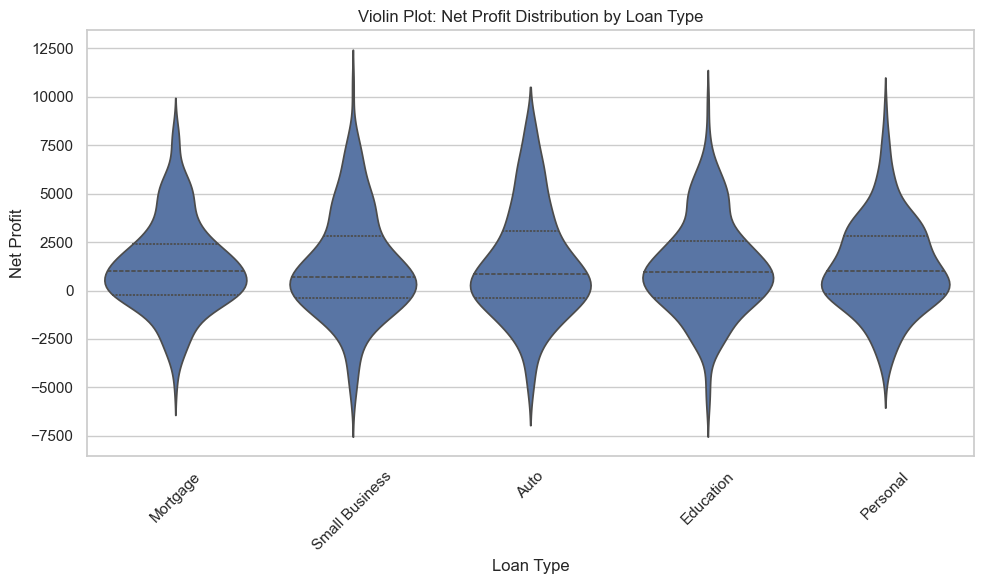

In [38]:
# 📊 Violin plot: visualize distribution & spread of Net Profit for each loan type
plt.figure(figsize=(10, 6))

# Create violin plot with quartile lines shown
sns.violinplot(data=df, x='Loan_Type', y='Net_Profit', inner="quartile")

# Add title and axis labels
plt.title("Violin Plot: Net Profit Distribution by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Net Profit")

# Improve readability by rotating labels
plt.xticks(rotation=45)

# Apply tight layout and display the plot
plt.tight_layout()
plt.show()




In [40]:
# Define a function to categorize each loan based on its Net Profit
def categorize_profit(profit):
    if profit > 2000:
        return 'High Profit'
    elif profit > 0:
        return 'Moderate Profit'
    else:
        return 'Loss-Making'

# Apply the categorization function to the Net_Profit column
df['Profit_Category'] = df['Net_Profit'].apply(categorize_profit)



In [39]:
# See how many loans fall into each category
print(df['Profit_Category'].value_counts())


Profit_Category
Moderate Profit    362
High Profit        321
Loss-Making        317
Name: count, dtype: int64


In [41]:
# Export the DataFrame to Excel
df.to_excel("cleaned_lending_data_with_segments.xlsx", index=False)


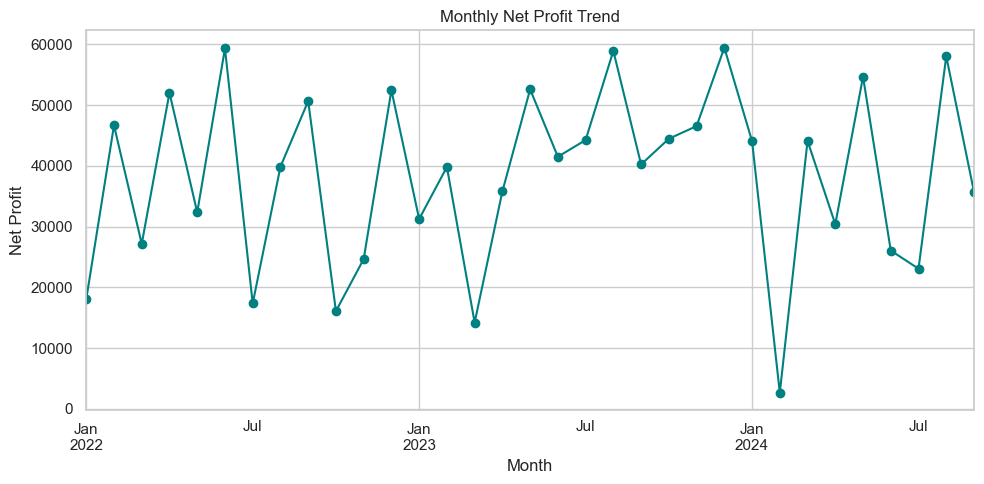

In [42]:
# Create a Month column from the Issue_Date
df['Month'] = pd.to_datetime(df['Issue_Date']).dt.to_period('M')

# Group by Month and calculate total Net Profit
monthly_profit = df.groupby('Month')['Net_Profit'].sum()

# Plot Monthly Net Profit
monthly_profit.plot(kind='line', title="Monthly Net Profit Trend", marker='o', color='teal', figsize=(10,5))
plt.ylabel("Net Profit")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


In [44]:
# Summarize key metrics per Loan Type
loan_summary = df.groupby('Loan_Type')[['Net_Profit', 'ROI', 'Risk_Score']].agg(['mean', 'median', 'std']).round(2)

# Show results
loan_summary


Net_Profit                     ROI              Risk_Score  \
                     mean   median      std  mean median   std       mean   
Loan_Type                                                                   
Auto              1363.87   850.18  2768.16  0.04   0.04  0.08      10.63   
Education         1231.75   934.39  2469.28  0.04   0.05  0.08      10.78   
Mortgage          1209.57  1001.91  2309.26  0.04   0.04  0.08      10.62   
Personal          1257.32  1034.82  2372.38  0.05   0.05  0.08      10.08   
Small Business    1265.69   700.40  2684.55  0.05   0.04  0.09      10.45   

                             
               median   std  
Loan_Type                    
Auto            10.71  5.56  
Education       10.78  5.41  
Mortgage        11.43  5.29  
Personal         9.97  5.56  
Small Business  10.28  5.77

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_10188\1795418417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Profit_Category', palette='Set2', order=df['Profit_Category'].value_counts().index)


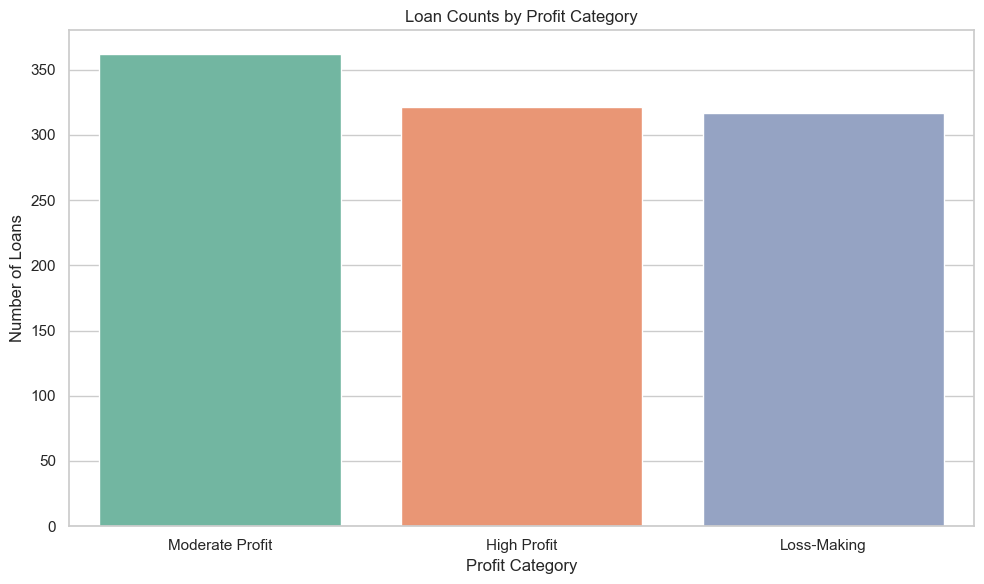

In [46]:
# Count of loans per profit category
sns.countplot(data=df, x='Profit_Category', palette='Set2', order=df['Profit_Category'].value_counts().index)
plt.title("Loan Counts by Profit Category")
plt.xlabel("Profit Category")
plt.ylabel("Number of Loans")
plt.tight_layout()
plt.show()


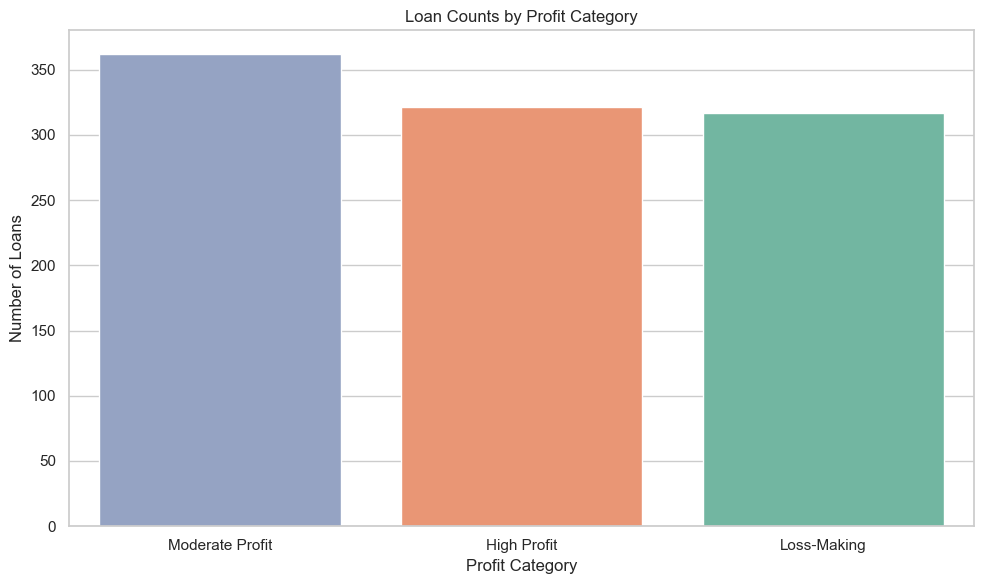

In [48]:
# 📊 Count of Loans per Profit Category (Warning-free version)
sns.countplot(data=df, x='Profit_Category', hue='Profit_Category',
              palette='Set2', legend=False,
              order=df['Profit_Category'].value_counts().index)

plt.title("Loan Counts by Profit Category")
plt.xlabel("Profit Category")
plt.ylabel("Number of Loans")
plt.tight_layout()
plt.show()


## Final Insights & Summary

- Most loans fall into the **Moderate Profit** or **Loss-Making** categories, indicating profitability is inconsistent.
- **Auto** and **Education** loan types tend to show more stable profit distributions, while **Small Business** loans are more volatile.
- **Monthly Net Profit Trend** shows variability — suggesting a need to explore external economic impacts or approval policies.
- ROI and Risk Score vary significantly across loan types and customer segments, which can guide lending strategy.
- Additional KPIs and dashboards (Power BI / Excel) make this project stakeholder-ready.

 This project demonstrates end-to-end data cleaning, profit modeling, EDA, visualization, and statistical testing in Python — ready for use in real fintech decision-making.
